<a href="https://colab.research.google.com/github/Whickd-07/Weather_Trend_Forecasting/blob/main/PM_Accelerator(Data_Science).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Level**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("GlobalWeatherRepository.csv")

# Display first few rows to understand the data
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

# Convert 'last_updated' to datetime format (if it's a string)
df["last_updated"] = pd.to_datetime(df["last_updated"])

# Ensure temperature is numeric
df["temperature_celsius"] = pd.to_numeric(df["temperature_celsius"], errors="coerce")

# Handling outliers using IQR (Interquartile Range)
Q1 = df["temperature_celsius"].quantile(0.25)
Q3 = df["temperature_celsius"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df["temperature_celsius"] >= lower_bound) & (df["temperature_celsius"] <= upper_bound)]


       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

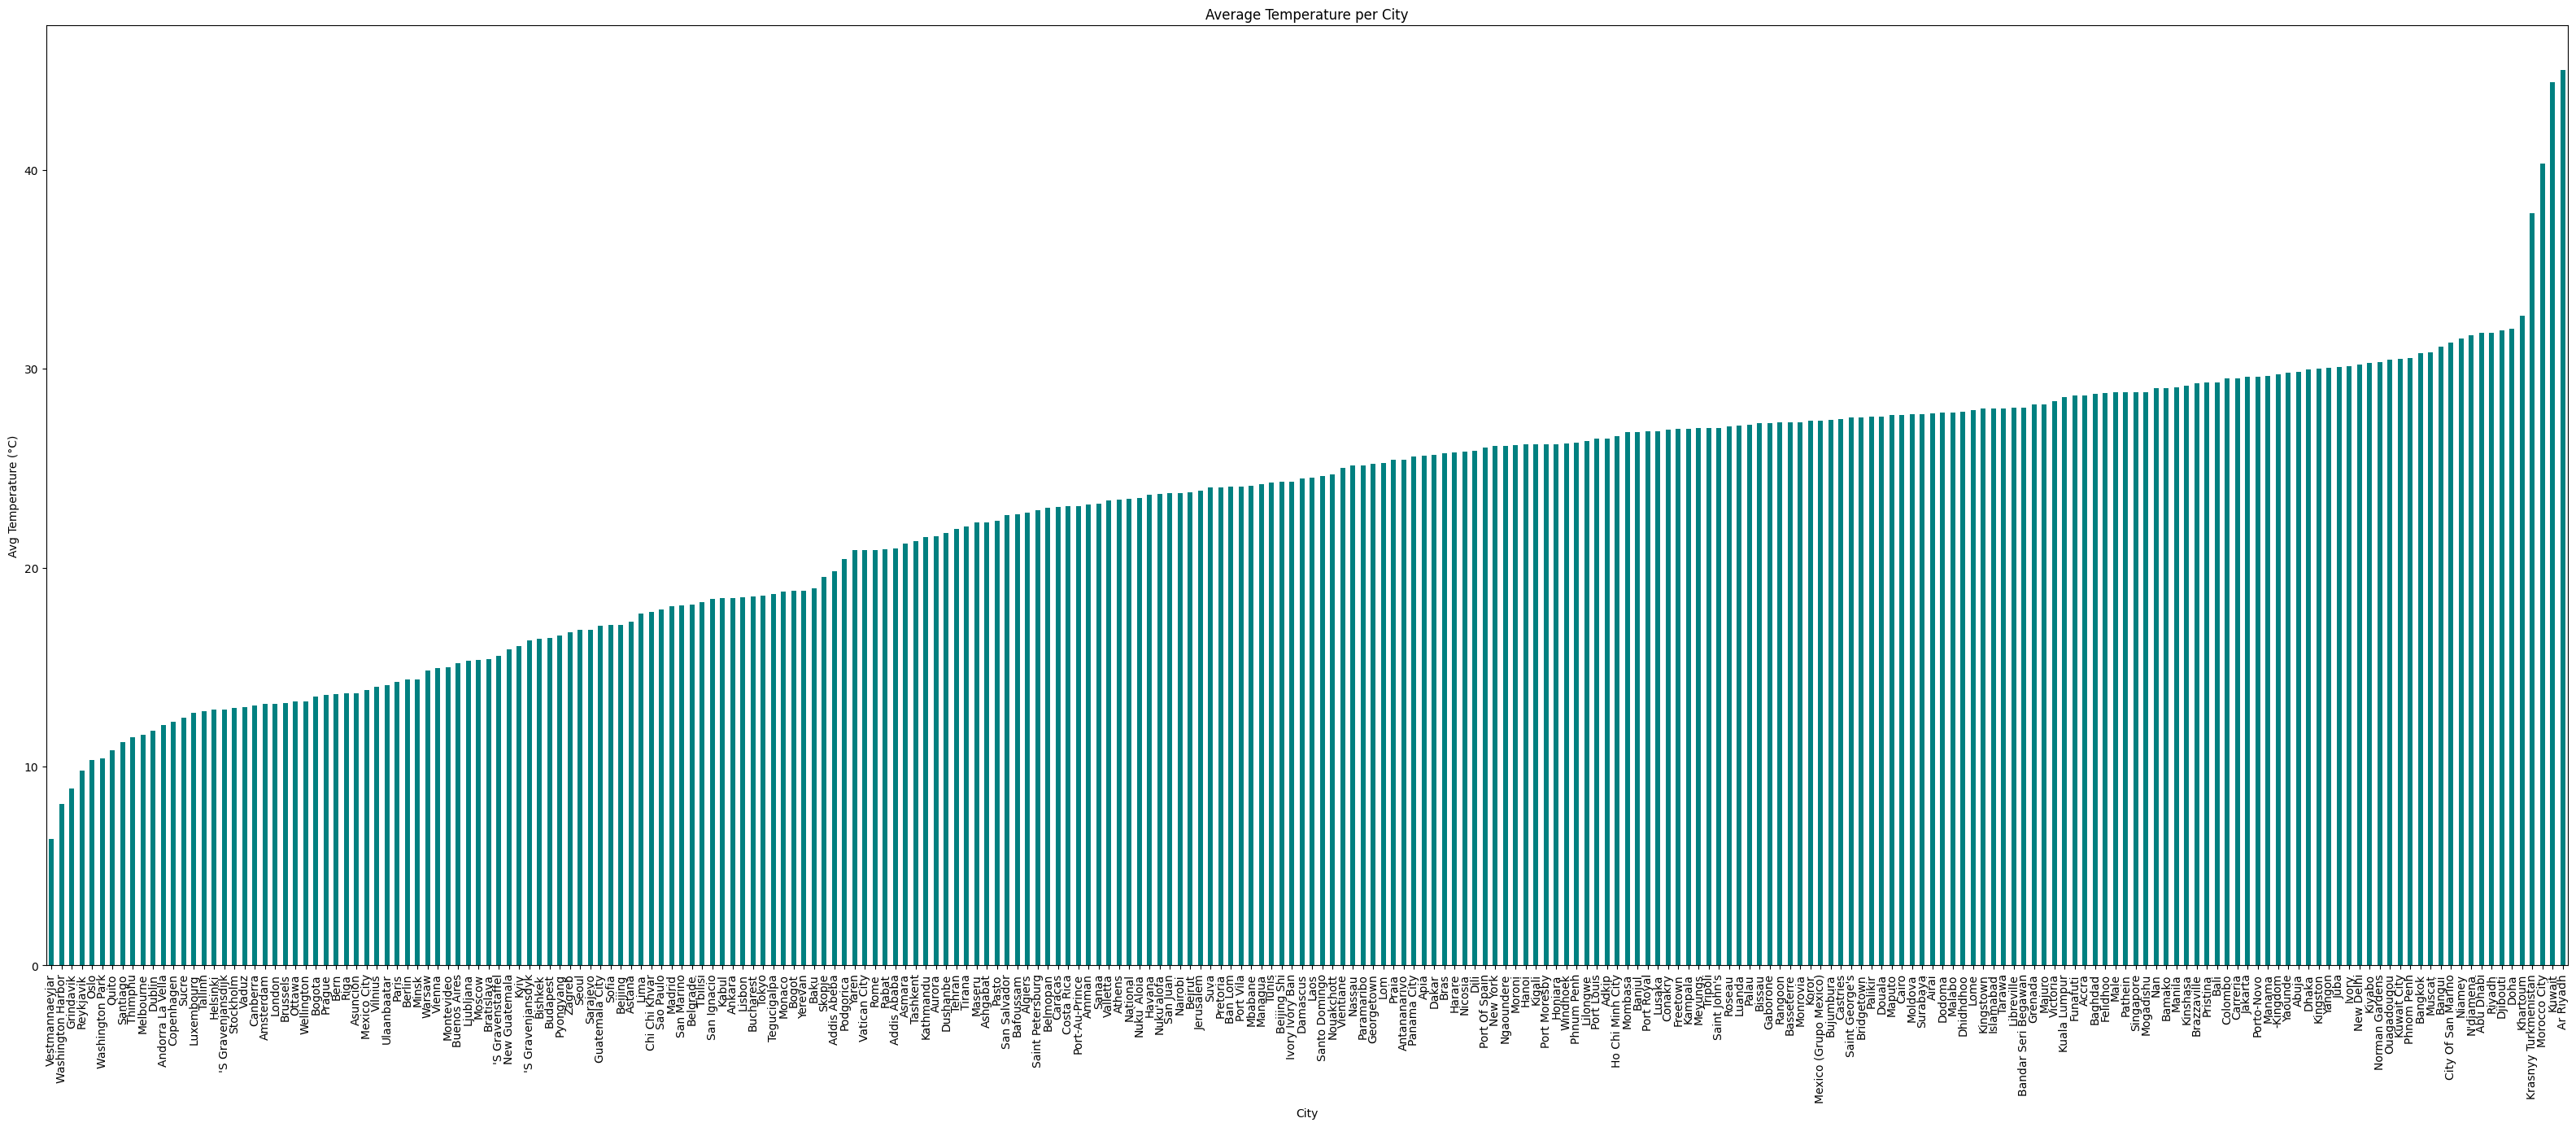

In [9]:

# ==============================
# 📊 Data Visualization
# ==============================
# 1️⃣ Bar Chart: Average Temperature Per City
avg_temp = df.groupby("location_name")["temperature_celsius"].mean().sort_values()
plt.figure(figsize=(40, 15))
avg_temp.plot(kind="bar", color="teal")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Avg Temperature (°C)")
plt.title("Average Temperature per City")
plt.show()



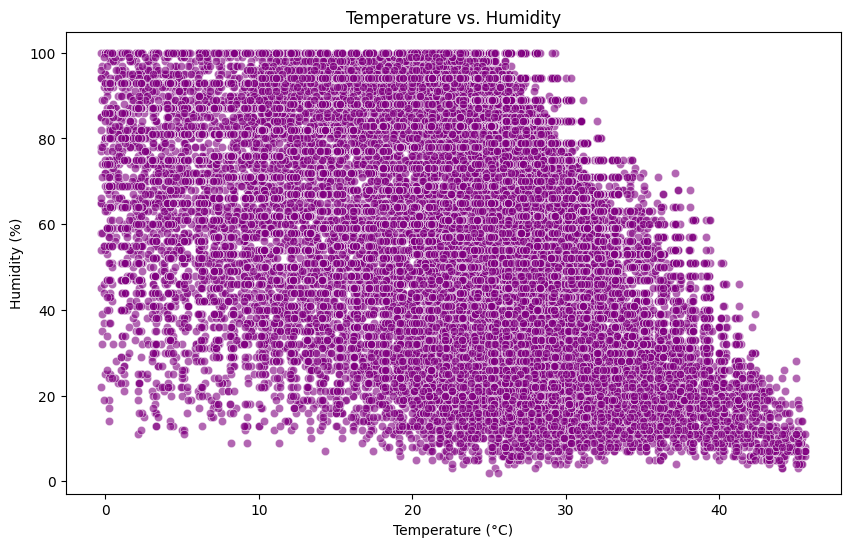

In [10]:

# ==============================
# 📊 Data Visualization
# ==============================
# 2️⃣ Scatter Plot: Temperature vs. Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["temperature_celsius"], y=df["humidity"], alpha=0.6, color="purple")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs. Humidity")
plt.show()


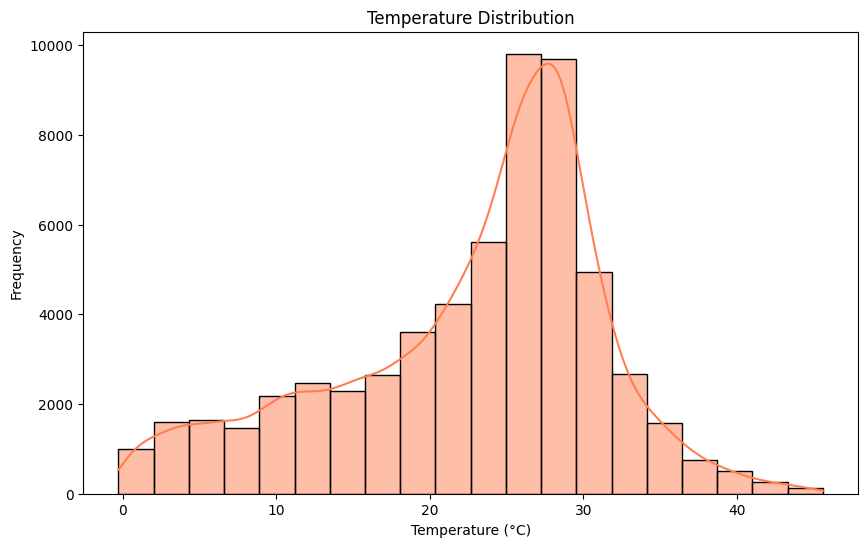

In [11]:

# ==============================
# 📊 Data Visualization
# ==============================
# 3️⃣ Histogram: Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["temperature_celsius"], bins=20, kde=True, color="coral")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()


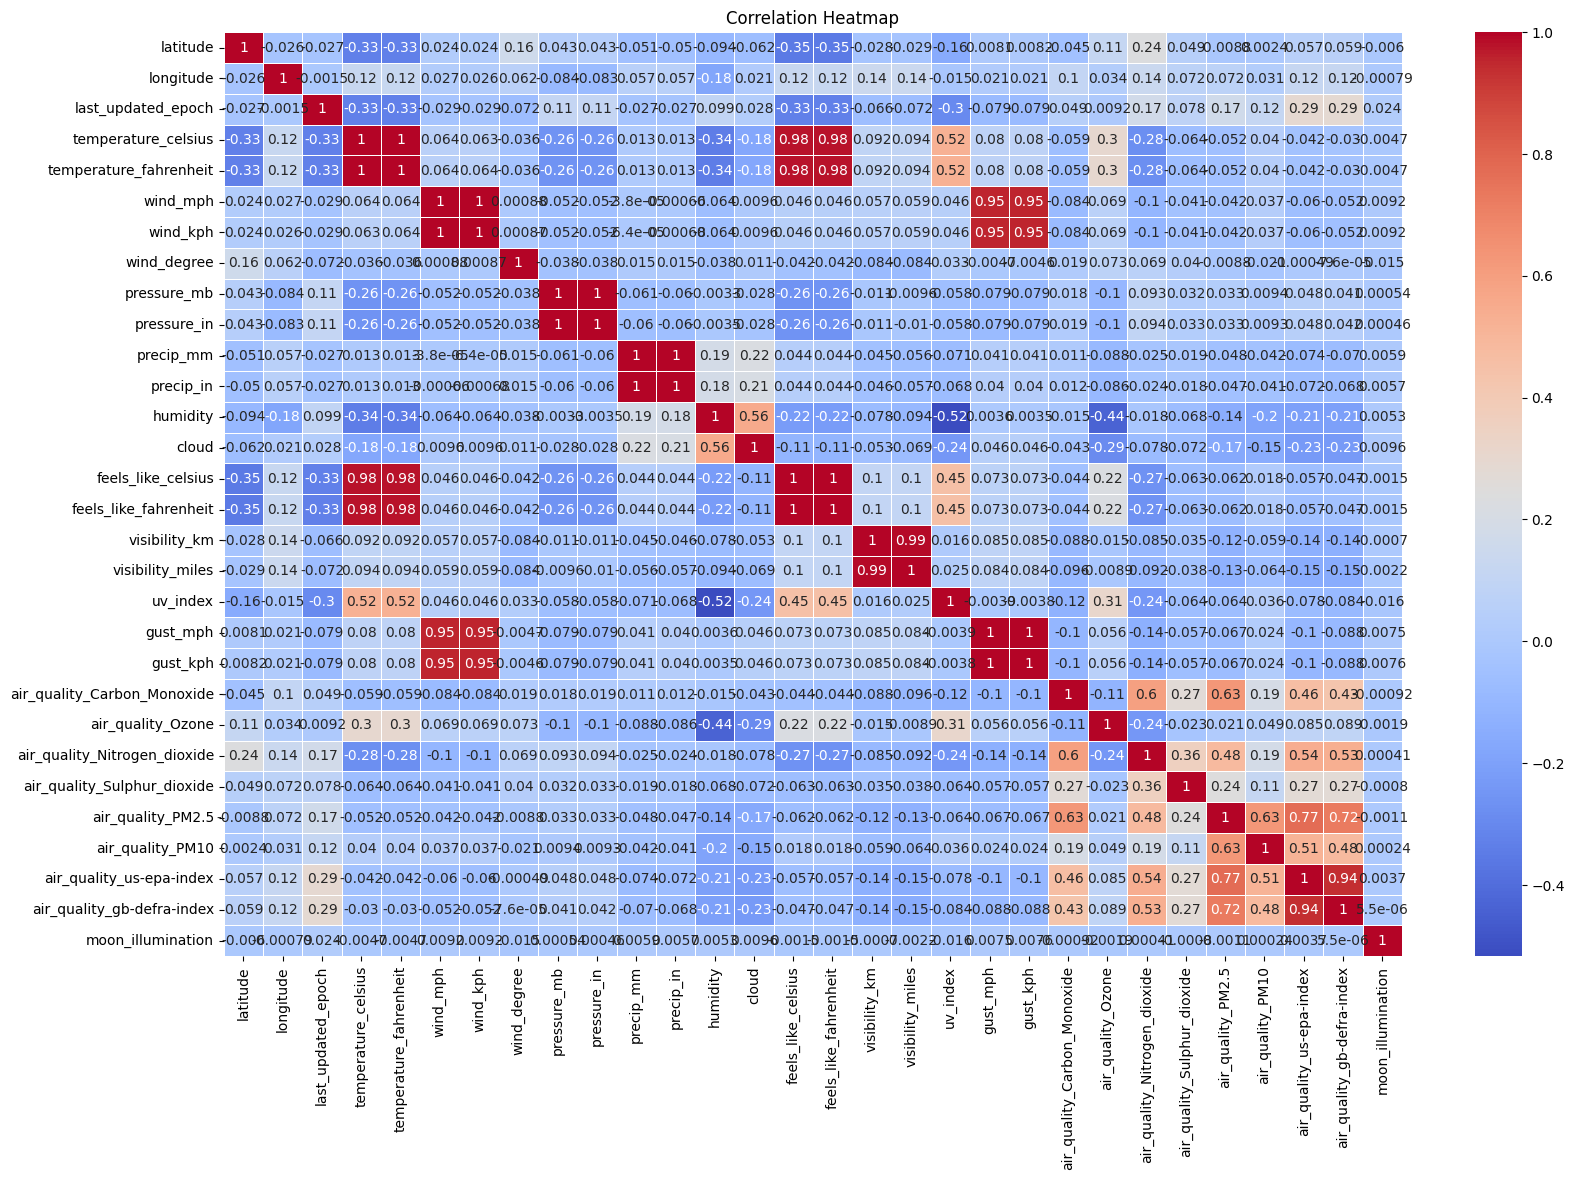

In [16]:
# ==============================
# 📊 Data Visualization
# ==============================
# 4️⃣ Heatmap: Correlation Between Variables
plt.figure(figsize=(19, 12))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

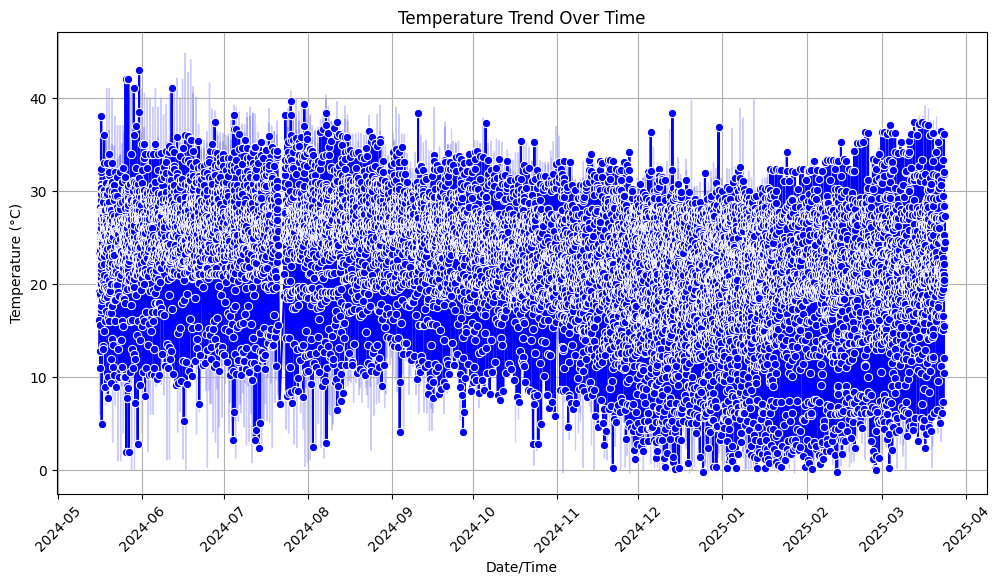

In [17]:

# ==============================
# 📊 Data Visualization
# ==============================

#5️⃣ Line Graph: Temperature Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["last_updated"], y=df["temperature_celsius"], marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Date/Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.grid(True)
plt.show()


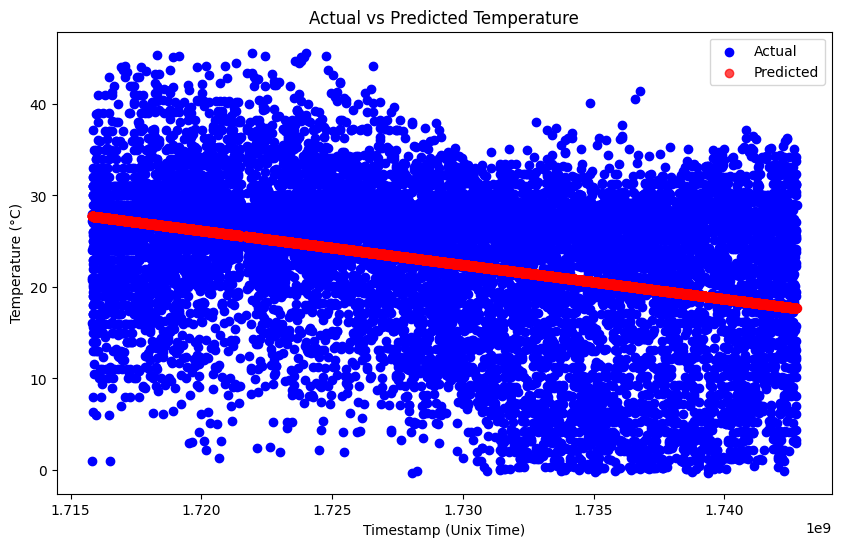

In [18]:
# ==============================
# 📈 Simple Temperature Trend Forecasting
# ==============================

# Extract numerical time values for prediction
df["timestamp"] = df["last_updated"].astype(np.int64) // 10**9  # Convert to Unix timestamp

# Splitting data into training and testing sets
X = df[["timestamp"]]
y = df["temperature_celsius"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict temperatures for the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.7)
plt.xlabel("Timestamp (Unix Time)")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()


# **Advanced Level**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import geopandas as gpd
import folium

# Load the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

# Display basic information
print("Dataset Overview:")
print(df.info())
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60413 entries, 0 to 60412
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       60413 non-null  object 
 1   location_name                 60413 non-null  object 
 2   latitude                      60413 non-null  float64
 3   longitude                     60413 non-null  float64
 4   timezone                      60413 non-null  object 
 5   last_updated_epoch            60413 non-null  int64  
 6   last_updated                  60413 non-null  object 
 7   temperature_celsius           60413 non-null  float64
 8   temperature_fahrenheit        60413 non-null  float64
 9   condition_text                60413 non-null  object 
 10  wind_mph                      60413 non-null  float64
 11  wind_kph                      60413 non-null  float64
 12  wind_degree                   60413 non-nu

In [31]:
# --------------------- Data Cleaning & Preprocessing ---------------------
# Checking for missing values
df.dropna(inplace=True)

# Convert date column to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Standardizing column names
df.columns = df.columns.str.strip().str.lower()
print("Updated Column Names:", df.columns)

# Handling categorical variables (encoding location names) if the column exists
location_columns = [col for col in df.columns if col.startswith('location_name_')]
if location_columns:
    print("Location name columns detected and used in analysis.")
else:
    print("No location name columns found.")

# --------------------- Anomaly Detection ---------------------
# Checking for missing columns before applying Isolation Forest
anomaly_features = ['temperature_celsius', 'humidity', 'pressure']
anomaly_features = [col for col in anomaly_features if col in df.columns]

if len(anomaly_features) == 3:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df['anomaly'] = iso_forest.fit_predict(df[anomaly_features])

    # Visualizing anomalies
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['last_updated'], y=df['temperature_celsius'], hue=df['anomaly'], palette={1: 'blue', -1: 'red'})
    plt.title("Anomaly Detection in Temperature Readings")
    plt.show()
else:
    print("Skipping anomaly detection due to missing columns:", anomaly_features)


Updated Column Names: Index(['country', 'latitude', 'longitude', 'timezone', 'last_updated_epoch',
       'last_updated', 'temperature_celsius', 'temperature_fahrenheit',
       'condition_text', 'wind_mph',
       ...
       'location_name_warsaw', 'location_name_washington harbor',
       'location_name_washington park', 'location_name_wellington',
       'location_name_windhoek', 'location_name_yangon',
       'location_name_yaounde', 'location_name_yaren', 'location_name_yerevan',
       'location_name_zagreb'],
      dtype='object', length=287)
Location name columns detected and used in analysis.
Skipping anomaly detection due to missing columns: ['temperature_celsius', 'humidity']


In [32]:
# --------------------- Forecasting Models ---------------------
model_features = ['humidity', 'pressure']
model_features = [col for col in model_features if col in df.columns]

y_column = 'temperature_celsius'
if model_features and y_column in df.columns:
    X = df[model_features]
    y = df[y_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training multiple models
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    rf_model.fit(X_train_scaled, y_train)
    gb_model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_rf = rf_model.predict(X_test_scaled)
    y_pred_gb = gb_model.predict(X_test_scaled)

    # Model Evaluation
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    print(f"Random Forest MAE: {mae_rf}")
    print(f"Gradient Boosting MAE: {mae_gb}")
else:
    print("Skipping forecasting models due to missing feature columns.")


Random Forest MAE: 6.364944343469789
Gradient Boosting MAE: 6.426806139361082


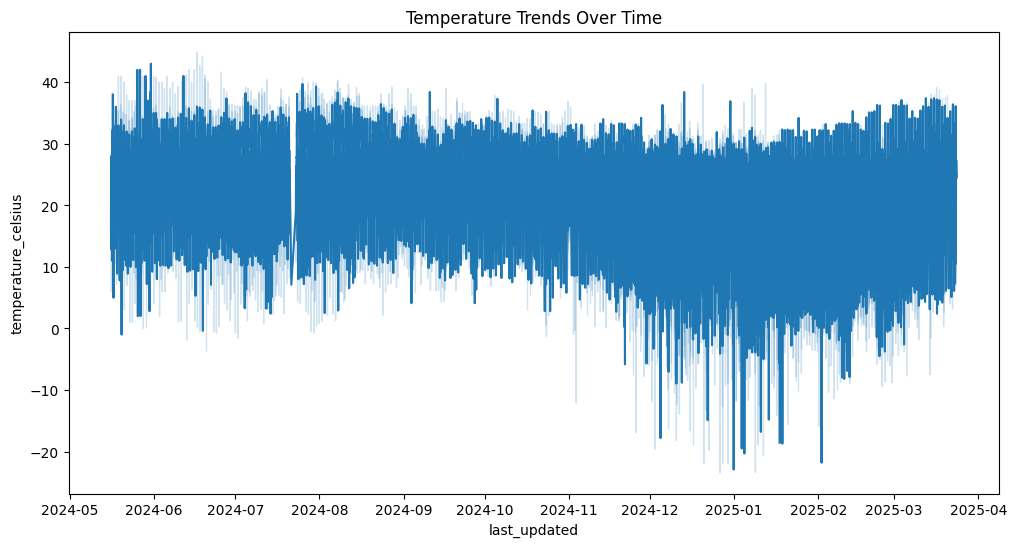

In [33]:
# --------------------- Climate Analysis ---------------------
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['last_updated'], y=df['temperature_celsius'])
plt.title("Temperature Trends Over Time")
plt.show()


In [34]:
# --------------------- Environmental Impact Analysis ---------------------
if 'temperature_celsius' in df.columns and 'humidity' in df.columns and 'pressure' in df.columns:
    sns.pairplot(df[['temperature_celsius', 'humidity', 'pressure']])
    plt.show()
else:
    print("Skipping environmental impact analysis due to missing columns.")

Skipping environmental impact analysis due to missing columns.


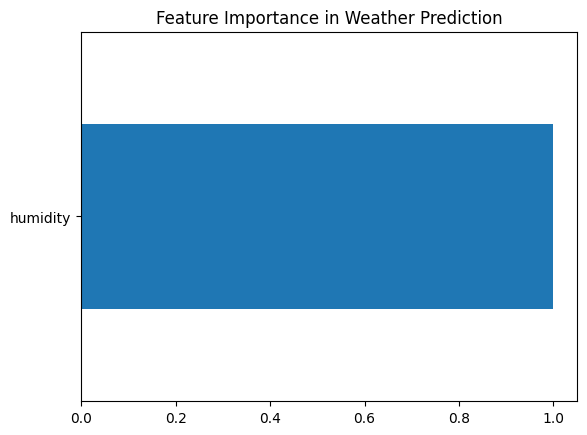

In [35]:
# --------------------- Feature Importance ---------------------
if model_features:
    feature_importances = pd.Series(rf_model.feature_importances_, index=model_features)
    feature_importances.nlargest(5).plot(kind='barh')
    plt.title("Feature Importance in Weather Prediction")
    plt.show()
else:
    print("Skipping feature importance analysis due to missing columns.")

In [39]:
from IPython.display import IFrame

# Display the interactive weather map in Colab
if 'latitude' in df.columns and 'longitude' in df.columns:
    m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=3)
    for _, row in df.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=f"Temp: {row['temperature_celsius']}").add_to(m)

    map_path = "weather_map.html"
    m.save(map_path)

    # Display the map in Colab
    display(IFrame(map_path, width=800, height=600))
else:
    print("Skipping map visualization due to missing latitude/longitude columns.")
